# Packages

In [1]:
### Import Packages ###
import os
import numpy as np
import pandas as pd
import math as math
import random as random
from scipy import stats
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split


### Local Packages ###
from utils.Prediction import *
from utils.Selector import *
from utils.Auxiliary import *
from utils.Main import *

# Input


In [2]:
DataType = "BreastCancer"
BaseDirectory = "/Users/simondn/Documents/RashomonActiveLearning/Results/"
RandomForesResults = LoadAnalyzedData(DataType, BaseDirectory, "RandomForestClassification", 0.0)
AnalyzedData010 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.01)
AnalyzedData015 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.015)
AnalyzedData020 = LoadAnalyzedData(DataType, BaseDirectory, "TreeFarms", 0.02)

# Shape

In [3]:
ShapeTable = {"DUREAL":[AnalyzedData010["Error_DUREAL"].shape[0],
                        AnalyzedData015["Error_DUREAL"].shape[0],
                        AnalyzedData020["Error_DUREAL"].shape[0]],
              "UNREAL": [AnalyzedData010["Error_UNREAL"].shape[0],
                         AnalyzedData015["Error_UNREAL"].shape[0], 
                         AnalyzedData020["Error_UNREAL"].shape[0]]}
ShapeTable = pd.DataFrame(ShapeTable)
ShapeTable.index = range(10,25,5)
ShapeTable

,DUREAL,UNREAL
10,100,100
15,100,100
20,100,100


# Run Time

In [4]:
TimeTable = {"DUREAL Mean":[str(round(np.mean(AnalyzedData010["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData015["Time_DUREAL"])/60,2)),
                        str(round(np.mean(AnalyzedData020["Time_DUREAL"])/60,2))],
              "UNREAL Mean": [str(round(np.mean(AnalyzedData010["Time_UNREAL"])/60,2)),
                         str(round(np.mean(AnalyzedData015["Time_UNREAL"])/60,2)), 
                         str(round(np.mean(AnalyzedData020["Time_UNREAL"])/60,2))],
                "DUREAL max":[str(round(np.max(AnalyzedData010["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData015["Time_DUREAL"])/60,2)),
                        str(round(np.max(AnalyzedData020["Time_DUREAL"])/60,2))],
              "UNREAL max": [str(round(np.max(AnalyzedData010["Time_UNREAL"])/60,2)),
                         str(round(np.max(AnalyzedData015["Time_UNREAL"])/60,2)), 
                         str(round(np.max(AnalyzedData020["Time_UNREAL"])/60,2))]
                         }
TimeTable = pd.DataFrame(TimeTable)
TimeTable.index = range(10,25,5)
TimeTable

,DUREAL Mean,UNREAL Mean,DUREAL max,UNREAL max
10,9.43,9.42,33.18,29.95
15,48.68,50.01,171.3,167.96
20,182.75,185.87,656.58,540.97


# Error Vec

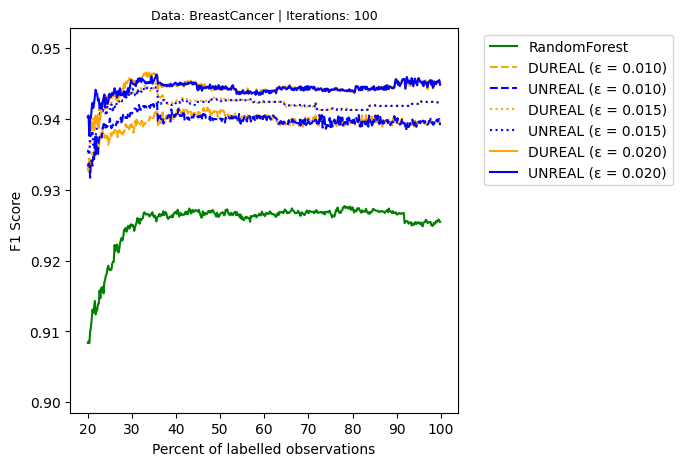

In [5]:
### Set Up ###
PlotSubtitle = f"Data: {DataType} | Iterations: {AnalyzedData010['Error_DUREAL'].shape[0]}"
colors = {
    "RandomForest": "green",
    "DUREAL010": "orange",
    "UNREAL010": "blue",
    "DUREAL015": "orange",
    "UNREAL015": "blue",
    "DUREAL020": "orange",
    "UNREAL020": "blue"
}

linestyles = {
    "RandomForest": "solid",
    "DUREAL010": "dashed",
    "UNREAL010": "dashed",
    "DUREAL015": "dotted",
    "UNREAL015": "dotted",
    "DUREAL020": "solid",
    "UNREAL020": "solid"
}

# markerstyles = {
#     "RandomForest": "^",
#     "DUREAL010": "^",
#     "UNREAL010": "^",
#     "DUREAL015": "^",
#     "UNREAL015": "^",
#     "DUREAL020": "^",
#     "UNREAL020": "^"
# }

LegendMapping = {
    "DUREAL010": "DUREAL (ε = 0.010)",
    "UNREAL010": "UNREAL (ε = 0.010)",
    "DUREAL015": "DUREAL (ε = 0.015)",
    "UNREAL015": "UNREAL (ε = 0.015)",
    "DUREAL020": "DUREAL (ε = 0.020)",
    "UNREAL020": "UNREAL (ε = 0.020)"
}

### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                 RandomForest = RandomForesResults["Error_RF"],
                 DUREAL010 = AnalyzedData010["Error_DUREAL"],
                 UNREAL010 = AnalyzedData010["Error_UNREAL"],
                 DUREAL015 = AnalyzedData015["Error_DUREAL"],
                 UNREAL015 = AnalyzedData015["Error_UNREAL"],
                 DUREAL020 = AnalyzedData020["Error_DUREAL"],
                 UNREAL020 = AnalyzedData020["Error_UNREAL"],
                 Colors = colors,
                LegendMapping=LegendMapping,
                 Linestyles=linestyles,
                #  Markerstyles = markerstyles,
                # xlim = [20,50],
                Y_Label = "F1 Score",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.00,
                 VarInput = False,
                 CriticalValue = 1.96)

# Input

In [ ]:
AnalyzedDataSmall = AnalyzedData010
AnalyzedDataLarge = AnalyzedData020

# Selection History

In [7]:
SelectionHistoryRank_RF = SelectionHistoryRankFunction(RandomForesResults["SelectionHistory_RF"], DataType = DataType)
SelectionHistoryRank_UNREALLarge = SelectionHistoryRankFunction(AnalyzedDataLarge["SelectionHistory_UNREAL"], DataType = DataType)
SelectionHistoryRank_DUREALLarge = SelectionHistoryRankFunction(AnalyzedDataLarge["SelectionHistory_DUREAL"], DataType = DataType)
SelectionHistoryRank_RF.sort_values(by = "AverageRank").head()
SelectionHistoryRank_UNREALLarge.sort_values(by = "AverageRank").head()
SelectionHistoryRank_DUREALLarge.sort_values(by = "AverageRank").head()

,AverageRank,ClumpThickness_10,CellSize_1,CellSize_10,CellShape_1,Adhesion_1,SingleEpithelialCellSize_2,BareNuclei_1,BareNuclei_10,NormalNucleoli_1,NormalNucleoli_10,Y
288,7.895522,0,1,0,0,1,0,0,0,0,1,1
6,8.150000,0,1,0,1,1,1,0,1,1,0,0
326,8.529412,1,1,0,1,1,1,0,1,0,0,1
299,9.884058,0,1,0,0,0,0,0,1,0,0,1
590,10.111111,0,0,1,0,0,0,1,0,1,0,1


# Tree Counts

In [8]:
UNREAL_Average_TreeCountsRatioSmall = np.mean(AnalyzedDataSmall["TreeCounts_UNIQUE_UNREAL"].div(AnalyzedDataSmall["TreeCounts_ALL_UNREAL"]), axis = 0)
DUREAL_Average_TreeCountsRatioSmall = np.mean(AnalyzedDataSmall["TreeCounts_UNIQUE_DUREAL"].div(AnalyzedDataSmall["TreeCounts_ALL_DUREAL"]), axis = 0)
AverageTreeCountRatioSmall = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatioSmall, 
                              DUREAL_Average_TreeCountsRatioSmall,
                              np.round(UNREAL_Average_TreeCountsRatioSmall - DUREAL_Average_TreeCountsRatioSmall,5))), 
                             columns = ["UNREAL", "DUREAL", "Difference"])

UNREAL_Average_TreeCountsRatioLarge = np.mean(AnalyzedDataLarge["TreeCounts_UNIQUE_UNREAL"].div(AnalyzedDataLarge["TreeCounts_ALL_UNREAL"]), axis = 0)
DUREAL_Average_TreeCountsRatioLarge = np.mean(AnalyzedDataLarge["TreeCounts_UNIQUE_DUREAL"].div(AnalyzedDataLarge["TreeCounts_ALL_DUREAL"]), axis = 0)
AverageTreeCountRatioLarge = pd.DataFrame(np.column_stack((UNREAL_Average_TreeCountsRatioLarge, 
                              DUREAL_Average_TreeCountsRatioLarge,
                              np.round(UNREAL_Average_TreeCountsRatioLarge - DUREAL_Average_TreeCountsRatioLarge,5))), 
                             columns = ["UNREAL", "DUREAL", "Difference"])

In [9]:
UNREAL_Average_TreeCountsRatioSmall = np.mean(AnalyzedDataSmall["TreeCounts_UNIQUE_UNREAL"].div(AnalyzedDataSmall["TreeCounts_ALL_UNREAL"]), axis = 1)

# Number of All Trees

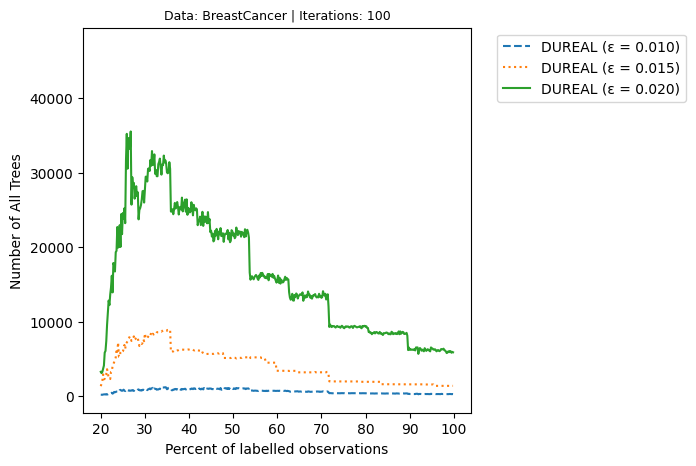

In [10]:
### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                 DUREAL010 = AnalyzedData010["TreeCounts_ALL_UNREAL"],
                #  UNREAL010 = AnalyzedData010["TreeCounts_UNIQUE_UNREAL"],
                 DUREAL015 = AnalyzedData015["TreeCounts_ALL_UNREAL"],
                #  UNREAL015 = AnalyzedData015["TreeCounts_UNIQUE_UNREAL"],
                 DUREAL020 = AnalyzedData020["TreeCounts_ALL_UNREAL"],
                #  UNREAL020 = AnalyzedData020["TreeCounts_UNIQUE_UNREAL"],
                # Colors = colors,
                 LegendMapping=LegendMapping,
                 Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "Number of All Trees",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.00,
                 VarInput = False,
                 CriticalValue = 1.96)

## Number of Unique Trees

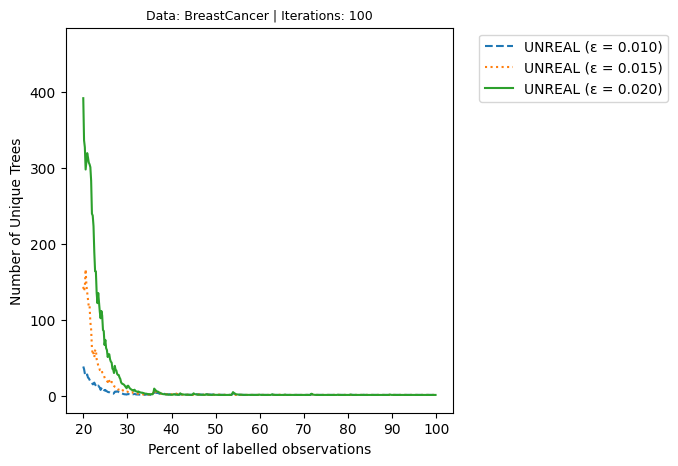

In [11]:
### Figure ##
MeanPlot = MeanVariancePlot(RelativeError = None,
                #  DUREAL010 = AnalyzedData010["TreeCounts_ALL_UNREAL"],
                 UNREAL010 = AnalyzedData010["TreeCounts_UNIQUE_UNREAL"],
                #  DUREAL015 = AnalyzedData015["TreeCounts_ALL_UNREAL"],
                 UNREAL015 = AnalyzedData015["TreeCounts_UNIQUE_UNREAL"],
                #  DUREAL020 = AnalyzedData020["TreeCounts_ALL_UNREAL"],
                 UNREAL020 = AnalyzedData020["TreeCounts_UNIQUE_UNREAL"],
                # Colors = colors,
                 LegendMapping=LegendMapping,
                 Linestyles=linestyles,
                # xlim = [20,50],
                Y_Label = "Number of Unique Trees",
                 Subtitle = PlotSubtitle,
                 TransparencyVal = 0.00,
                 VarInput = False,
                 CriticalValue = 1.96)